In [6]:
import pandas as pd

In [7]:
import matplotlib.pyplot as plt

In [8]:
import numpy as np

In [9]:
Raw_Housing_Data = ("1. Regression - Module - (Housing Prices).csv")

In [10]:
data = pd.read_csv(Raw_Housing_Data)

In [11]:
data['Sale Price'].mean()

540198.4357443658

In [12]:
#Initializing new column
data['Condition_Sale'] = 0

/var/folders/r_/dmgv9h0x3k7610rhwr96d_cc0000gn/T/ipykernel_6403/3986192971.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['Condition_Sale'][data['Condition of the House']==str(i)] = data['Sale Price'][data['Condition of the House']==str(i)].mean()


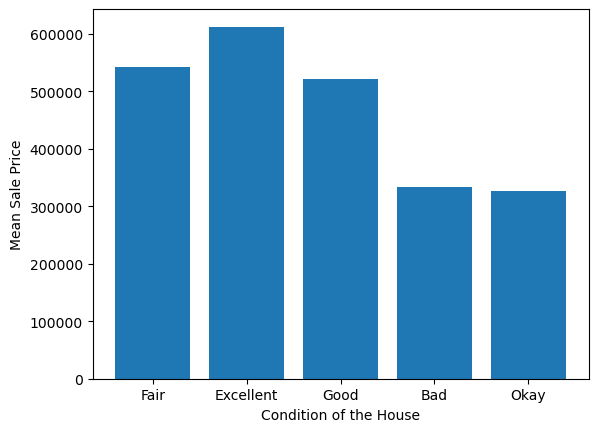

In [13]:
#Calculating mean based on the condition of the house
for i in data['Condition of the House'].unique():
    data['Condition_Sale'][data['Condition of the House']==str(i)] = data['Sale Price'][data['Condition of the House']==str(i)].mean()
#Plotting the mean saless based upon the condition of the house
plt.figure(dpi=100)
plt.bar(data['Condition of the House'].unique(),data['Condition_Sale'].unique())
plt.xlabel("Condition of the House")
plt.ylabel("Mean Sale Price")
plt.show()

In [14]:
#Initializing new column
data['Zip_Condition_Sale'] = 0
C = 'Condition of the House'
Z = 'Zipcode'

In [15]:
#Calculating mean based on the condition of the house and zipcode
for i in data[C].unique():
    for j in data[Z].unique():
        data['Zip_Condition_Sale'][(data[C] == str(i))&(data[Z] == j)] = data['Sale Price'][(data[C] == str(i))&(data[Z] == j)].mean()
len(data['Zip_Condition_Sale'].unique())

/var/folders/r_/dmgv9h0x3k7610rhwr96d_cc0000gn/T/ipykernel_6403/2291339351.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['Zip_Condition_Sale'][(data[C] == str(i))&(data[Z] == j)] = data['Sale Price'][(data[C] == str(i))&(data[Z] == j)].mean()


281

In [16]:
zip_condition_sale = data.groupby(['Condition of the House', 'Zipcode'])['Sale Price'].mean()
zip_condition_sale

Condition of the House  Zipcode
Bad                     98004.0    1.500000e+06
                        98006.0    3.725000e+05
                        98011.0    2.700000e+05
                        98023.0    1.500000e+05
                        98024.0    1.420000e+05
                                       ...     
Okay                    98155.0    3.601833e+05
                        98166.0    2.165625e+05
                        98168.0    1.809389e+05
                        98178.0    1.750000e+05
                        98198.0    2.705325e+05
Name: Sale Price, Length: 283, dtype: float64

In [17]:
zipcode_condition_sale2 = pd.pivot_table(data,index = ["Condition of the House","Zipcode"], values=["Sale Price"], aggfunc=np.mean)
zipcode_condition_sale2

Sale Price
Condition of the House Zipcode              
Bad                    98004.0  1.500000e+06
                       98006.0  3.725000e+05
                       98011.0  2.700000e+05
                       98023.0  1.500000e+05
                       98024.0  1.420000e+05
...                                      ...
Okay                   98155.0  3.601833e+05
                       98166.0  2.165625e+05
                       98168.0  1.809389e+05
                       98178.0  1.750000e+05
                       98198.0  2.705325e+05

[283 rows x 1 columns]

In [18]:
zipcode_condition_sale3 = pd.pivot_table(data,index = ['Zipcode'], columns = ['Condition of the House'], values = ['Sale Price'], aggfunc = np.mean)
zipcode_condition_sale3

Sale Price                                            \
Condition of the House        Bad     Excellent          Fair          Good   
Zipcode                                                                       
98001.0                       NaN  2.425433e+05  2.927207e+05  2.527446e+05   
98002.0                       NaN  2.216411e+05  2.588868e+05  2.192858e+05   
98003.0                       NaN  3.706800e+05  2.992801e+05  2.809591e+05   
98004.0                 1500000.0  1.236365e+06  1.527265e+06  1.145915e+06   
98005.0                       NaN  8.319500e+05  8.668012e+05  7.669397e+05   
...                           ...           ...           ...           ...   
98177.0                       NaN  8.966313e+05  6.496812e+05  6.665755e+05   
98178.0                       NaN  2.975217e+05  3.094105e+05  3.308419e+05   
98188.0                       NaN  2.853636e+05  2.900059e+05  2.867413e+05   
98198.0                       NaN  3.215235e+05  2.941619e+05  3.154305e+05   
98199.0                       NaN  9.338983e+05  7.604974e+05  7.963811e+05   

                                  
Condition of the House      Okay  
Zipcode                           
98001.0                 356070.0  
98002.0                      NaN  
98003.0                 235500.0  
98004.0                 425000.0  
98005.0                 577750.0  
...                          ...  
98177.0                      NaN  
98178.0                 175000.0  
98188.0                      NaN  
98198.0                 270532.5  
98199.0                      NaN  

[70 rows x 5 columns]

In [19]:
data['plot_length'] = data['Flat Area (in Sqft)']**0.5
data['plot_length'].head()

0    34.351128
1    50.695167
2    27.748874
3    44.271887
4    40.987803
Name: plot_length, dtype: float64

In [20]:
data['total_area'] = data['Lot Area (in Sqft)'] + data['Flat Area (in Sqft)']
data['total_area'].head()

0     6830.0
1     9812.0
2    10770.0
3     6960.0
4     9760.0
Name: total_area, dtype: float64

In [21]:
data['Condition of the House'][data['Condition of the House'] == 'Fair'] = '1'
data['Condition of the House'][data['Condition of the House'] == 'Okay'] = '0'
data['Condition of the House'][data['Condition of the House'] == 'Bad'] = '0'
data['Condition of the House'][data['Condition of the House'] == 'Good'] = '1'
data['Condition of the House'][data['Condition of the House'] == 'Excellent'] = '0'
data['Condition of the House'].unique()
#Wrong output search

/var/folders/r_/dmgv9h0x3k7610rhwr96d_cc0000gn/T/ipykernel_6403/1554278397.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['Condition of the House'][data['Condition of the House'] == 'Fair'] = '1'
/var/folders/r_/dmgv9h0x3k7610rhwr96d_cc0000gn/T/ipykernel_6403/1554278397.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['Condition of the House'][data['Condition of the House'] == 'Okay'] = '0'
/var/folders/r_/dmgv9h0x3k7610rhwr96d_cc0000gn/T/ipykernel_6403/1554278397.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: htt

array(['1', '0'], dtype=object)

In [22]:
data['Condition of the House'] = data['Condition of the House'].map({'Good':'1',
                                                                    'Excellent':'3',
                                                                    'Bad':'0',
                                                                    'Fair':'1',
                                                                    'Okay':'0'})
data['Condition of the House'].unique()
#Wrong output search

array([nan], dtype=object)

In [23]:
year = []
for i in range(len(data['Date House was Sold'])):
    k = data['Date House was Sold'][i].split()[-1]
    year.append(k)
data['year_sold'] = year
data['year_sold'].head()

0    2017
1    2017
2    2016
3    2017
4    2016
Name: year_sold, dtype: object

In [25]:
def year(value):
    return value.split()[-1]

data['year_sold'] = data['Date House was Sold'].map(year)
data['year_sold'].head()

0    2017
1    2017
2    2016
3    2017
4    2016
Name: year_sold, dtype: object

In [30]:
data['luxury_home'] = 0
for i in range(len(data)):
    count = 0
    if data['Waterfront View'][i] == 'Yes':
        count = count + 1
    if data['Condition of the House'][i] in ['Good', 'Excellent']:
        count = count + 1
    if data['Overall Grade'][i] >= 8:
        count = count + 1
    if count >= 2:
        data['luxury_home'][i] = 'Yes'
    else:
        data['luxury_home'][i] = 'No'
        
data['luxury_home'].unique()

/var/folders/r_/dmgv9h0x3k7610rhwr96d_cc0000gn/T/ipykernel_6403/1514440531.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['luxury_home'][i] = 'No'


array(['No', 'Yes'], dtype=object)

In [37]:
def luxury_home(row):
    count = 0
    if row[0] == 'Yes':
        count = count + 1
    if row[1] in ['Good', 'Excellent']:
        count = count + 1
    if row[2] >= 8:
        count = count + 1
    if count >= 2:
        return 'Yes'
    else:
        return 'No'
data['luxury_home'] = data[['Waterfront View', 'Condition of the House', 'Overall Grade']].apply(luxury_home, axis = 1)
data['luxury_home'].unique()

array(['No', 'Yes'], dtype=object)